In [1]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense


from keras.initializers import GlorotUniform

from sklearn.metrics import accuracy_score
from keras.utils import to_categorical

from matplotlib import pyplot as plt

np.random.seed(2)

https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data.

По ссылке можно найти описание датасета и задачи.

Цель - определить наличие диабета по анамнезу пациента.

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Визуализируем распределение данных

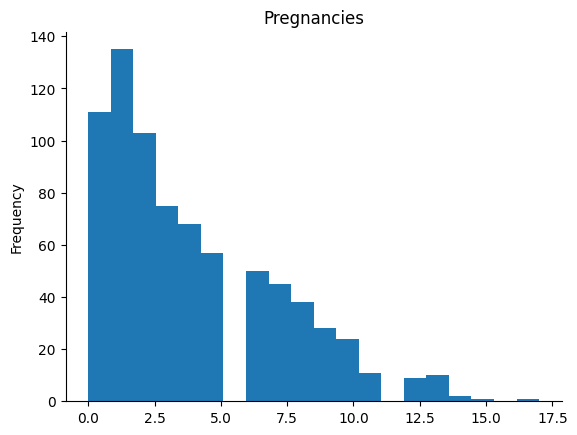

In [3]:
df['Pregnancies'].plot(kind='hist', bins=20, title='Pregnancies')
plt.gca().spines[['top', 'right',]].set_visible(False)

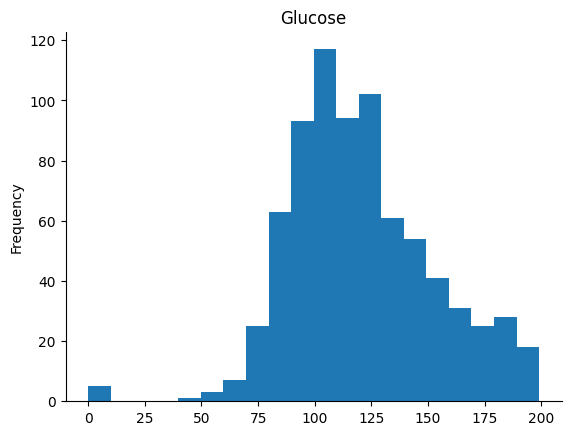

In [4]:
df['Glucose'].plot(kind='hist', bins=20, title='Glucose')
plt.gca().spines[['top', 'right',]].set_visible(False)

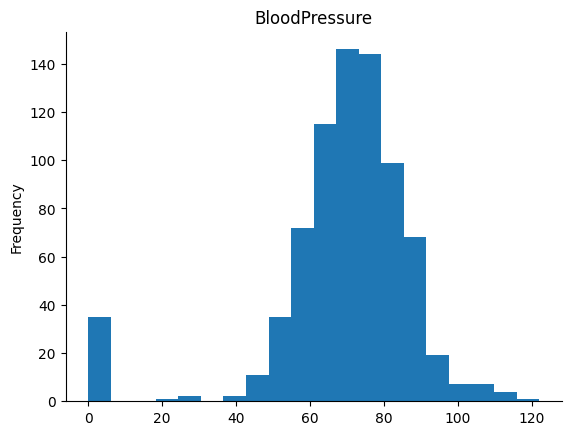

In [5]:
df['BloodPressure'].plot(kind='hist', bins=20, title='BloodPressure')
plt.gca().spines[['top', 'right',]].set_visible(False)

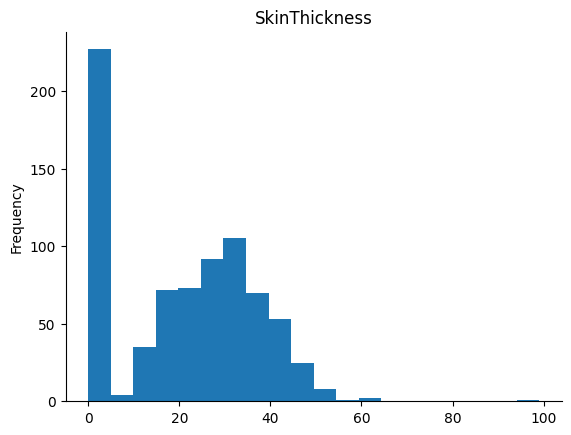

In [6]:
df['SkinThickness'].plot(kind='hist', bins=20, title='SkinThickness')
plt.gca().spines[['top', 'right',]].set_visible(False)

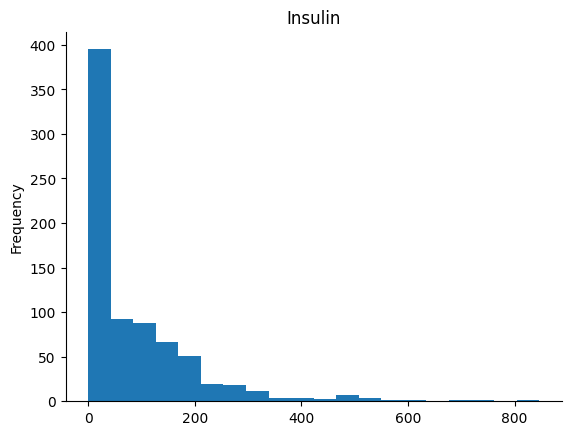

In [7]:
df['Insulin'].plot(kind='hist', bins=20, title='Insulin')
plt.gca().spines[['top', 'right',]].set_visible(False)

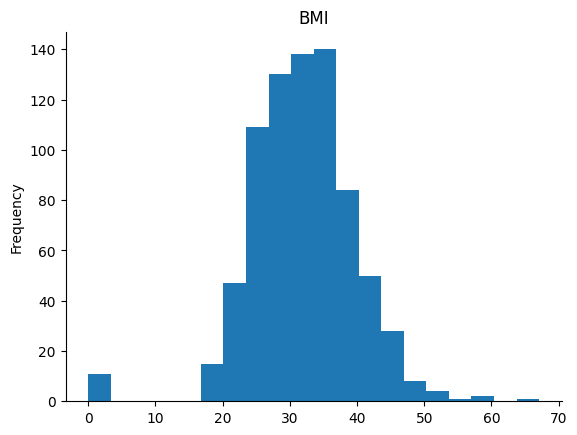

In [8]:
df['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

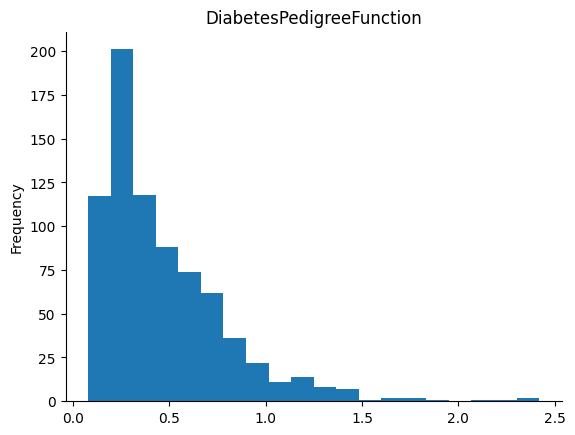

In [9]:
df['DiabetesPedigreeFunction'].plot(kind='hist', bins=20, title='DiabetesPedigreeFunction')
plt.gca().spines[['top', 'right',]].set_visible(False)

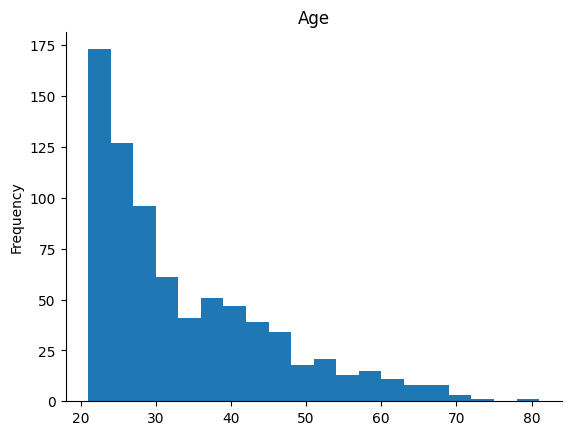

In [10]:
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

Разделяем датасет на тренировочную и тестовую выборки. Размер обучающей выборки составляет 80% от всего датасета.

Формируем вектор принаков и вектор весов(вектор весов приводим к размеру (...,2)), так как имеем задачу классификации на два класса.

In [11]:
X_train = df.iloc[:615,0:8]
X_test =  df.iloc[615:,0:8]

Y_train = to_categorical(df.iloc[:615,8], num_classes=2)
Y_test = to_categorical(df.iloc[615:,8], num_classes=2)

In [12]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
610,3,106,54,21,158,30.9,0.292,24
611,3,174,58,22,194,32.9,0.593,36
612,7,168,88,42,321,38.2,0.787,40
613,6,105,80,28,0,32.5,0.878,26


In [13]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
615,3,106,72,0,0,25.8,0.207,27
616,6,117,96,0,0,28.7,0.157,30
617,2,68,62,13,15,20.1,0.257,23
618,9,112,82,24,0,28.2,1.282,50
619,0,119,0,0,0,32.4,0.141,24
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [14]:
Y_train

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [15]:
Y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

Создаем модель нейронной сети. Определяем входные и выходные размерности данных, размеры слоев, функции активации каждого слои и методы инициализации весов.

Именно на этом моменте задается алгоритм начальной инициализации весов. По заданию, необходимо использовать алгоритм Ксавьера с нормлальным распределением.
Реализация алгоритма для весов одного слоя может выглядеть так:
```
params = numpy.random.normal(
    scale=gain * numpy.sqrt(
        2.0 / (prev_size + layer_size),
    ),
    size=(prev_size, layer_size),
)
```
где 𝑙𝑎𝑦𝑒𝑟_𝑠𝑖𝑧𝑒 - размер слоя, 𝑝𝑟𝑒𝑣_𝑠𝑖𝑧𝑒 – размер предыдущего
слоя, 𝑔𝑎𝑖𝑛 – параметр усиления, зависящий от типа функций
активации.

Однако в библоиотеке keras в модуле initializers есть готовый метод, реализующий алгоритм Ксавьера с нормальным распределением - GlorotUniform.

In [16]:
# создаем модель нейронной сети

input_dim = 8  # количество входных признаков
output_dim = 2  # 2 класса на выходе

model = Sequential([
    # Добавляем входной слой с инициализацией весов по Ксавье и функцией активации ReLU
    Dense(128, activation='relu', input_shape=(input_dim,), kernel_initializer=GlorotUniform()),
    # Добавляем несколько скрытых слоев с инициализацией весов по Ксавье и функцией активации ReLU
    Dense(64, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(32, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(128, activation='relu', kernel_initializer=GlorotUniform()),
    Dense(16, activation='relu', kernel_initializer=GlorotUniform()),
    # Выходной слой с функцией активации softmax для классификации
    Dense(output_dim, activation='softmax', kernel_initializer=GlorotUniform())
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 128)               4224      
                                                                 
 dense_4 (Dense)             (None, 16)                2064      
                                                                 
 dense_5 (Dense)             (None, 2)                 34        
                                                                 
Total params: 17810 (69.57 KB)
Trainable params: 17810 (

При помощи метода compile() скомпилируем модель.

* loss – функция потерь
* optimizer – оптимизатор, используем встроенный метод стохастической оптимизации adam
* metrics – список метрик оптимизации, так как дана задача классификации, используем метрику accuracy как основную

In [17]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy', 'Recall'])

Обучаем модель

In [18]:
model.fit(X_train, Y_train, epochs = 250)

Epoch 1/250
20/20 [==============================] - 3s 7ms/step - loss: 1.0834 - accuracy: 0.6049 - recall: 0.6049
Epoch 2/250
20/20 [==============================] - 0s 6ms/step - loss: 0.8212 - accuracy: 0.6260 - recall: 0.6260
Epoch 3/250
20/20 [==============================] - 0s 7ms/step - loss: 0.7563 - accuracy: 0.6618 - recall: 0.6618
Epoch 4/250
20/20 [==============================] - 0s 5ms/step - loss: 0.7093 - accuracy: 0.6553 - recall: 0.6553
Epoch 5/250
20/20 [==============================] - 0s 5ms/step - loss: 0.6689 - accuracy: 0.6585 - recall: 0.6585
Epoch 6/250
20/20 [==============================] - 0s 7ms/step - loss: 0.6400 - accuracy: 0.6683 - recall: 0.6683
Epoch 7/250
20/20 [==============================] - 0s 6ms/step - loss: 0.5903 - accuracy: 0.6992 - recall: 0.6992
Epoch 8/250
20/20 [==============================] - 0s 6ms/step - loss: 0.5746 - accuracy: 0.7041 - recall: 0.7041
Epoch 9/250
20/20 [==============================] - 0s 5ms/step - loss:

Делаем предсказание на тестовой выборке

In [19]:
y_predict = ( model.predict(X_test) > 0.5).astype("int32")

5/5 [==============================] - 0s 3ms/step


In [20]:
y_predict

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0,

Оцениваем качество работы нейросети

In [21]:
accuracy_score(Y_test, y_predict)

0.7516339869281046